In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
data.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
data.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

In [ ]:
data.Automatic.unique()

array([0, 1])

In [ ]:
data.cc.unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332])

In [ ]:
data.Doors.unique()

array([3, 5, 4, 2])

In [ ]:
data.Cylinders.unique()

array([4])

In [ ]:
data.Gears.unique()

array([5, 6, 3, 4])

In [ ]:
data.Weight.unique()

array([1165, 1170, 1245, 1185, 1105, 1065, 1120, 1100, 1255, 1270, 1110,
       1195, 1180, 1075, 1130, 1275, 1060, 1115, 1265, 1260, 1125, 1155,
       1045, 1480, 1320, 1280, 1135, 1090, 1150, 1085, 1160, 1205, 1084,
       1140, 1095, 1025, 1119, 1080, 1121, 1615, 1067, 1040, 1030, 1055,
       1050, 1103, 1070, 1035, 1015, 1000, 1078, 1079, 1109, 1020, 1010,
       1114, 1172, 1094, 1083])

In [ ]:
data.drop('Cylinders',axis=1,inplace=True)

In [ ]:
data.drop('Doors',axis=1,inplace=True)

In [ ]:
encoder=LabelEncoder()

In [ ]:
data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type'])

In [ ]:
data.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.014629,0.335637
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.020613,1.000000


In [ ]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986,1,90,0,2000,5,1165
1,13750,23,72937,1,90,0,2000,5,1165
2,13950,24,41711,1,90,0,2000,5,1165
3,14950,26,48000,1,90,0,2000,5,1165
4,13750,30,38500,1,90,0,2000,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,5,1025
1432,10845,72,19000,2,86,0,1300,5,1015
1433,8500,71,17016,2,86,0,1300,5,1015
1434,7250,70,16916,2,86,0,1300,5,1015


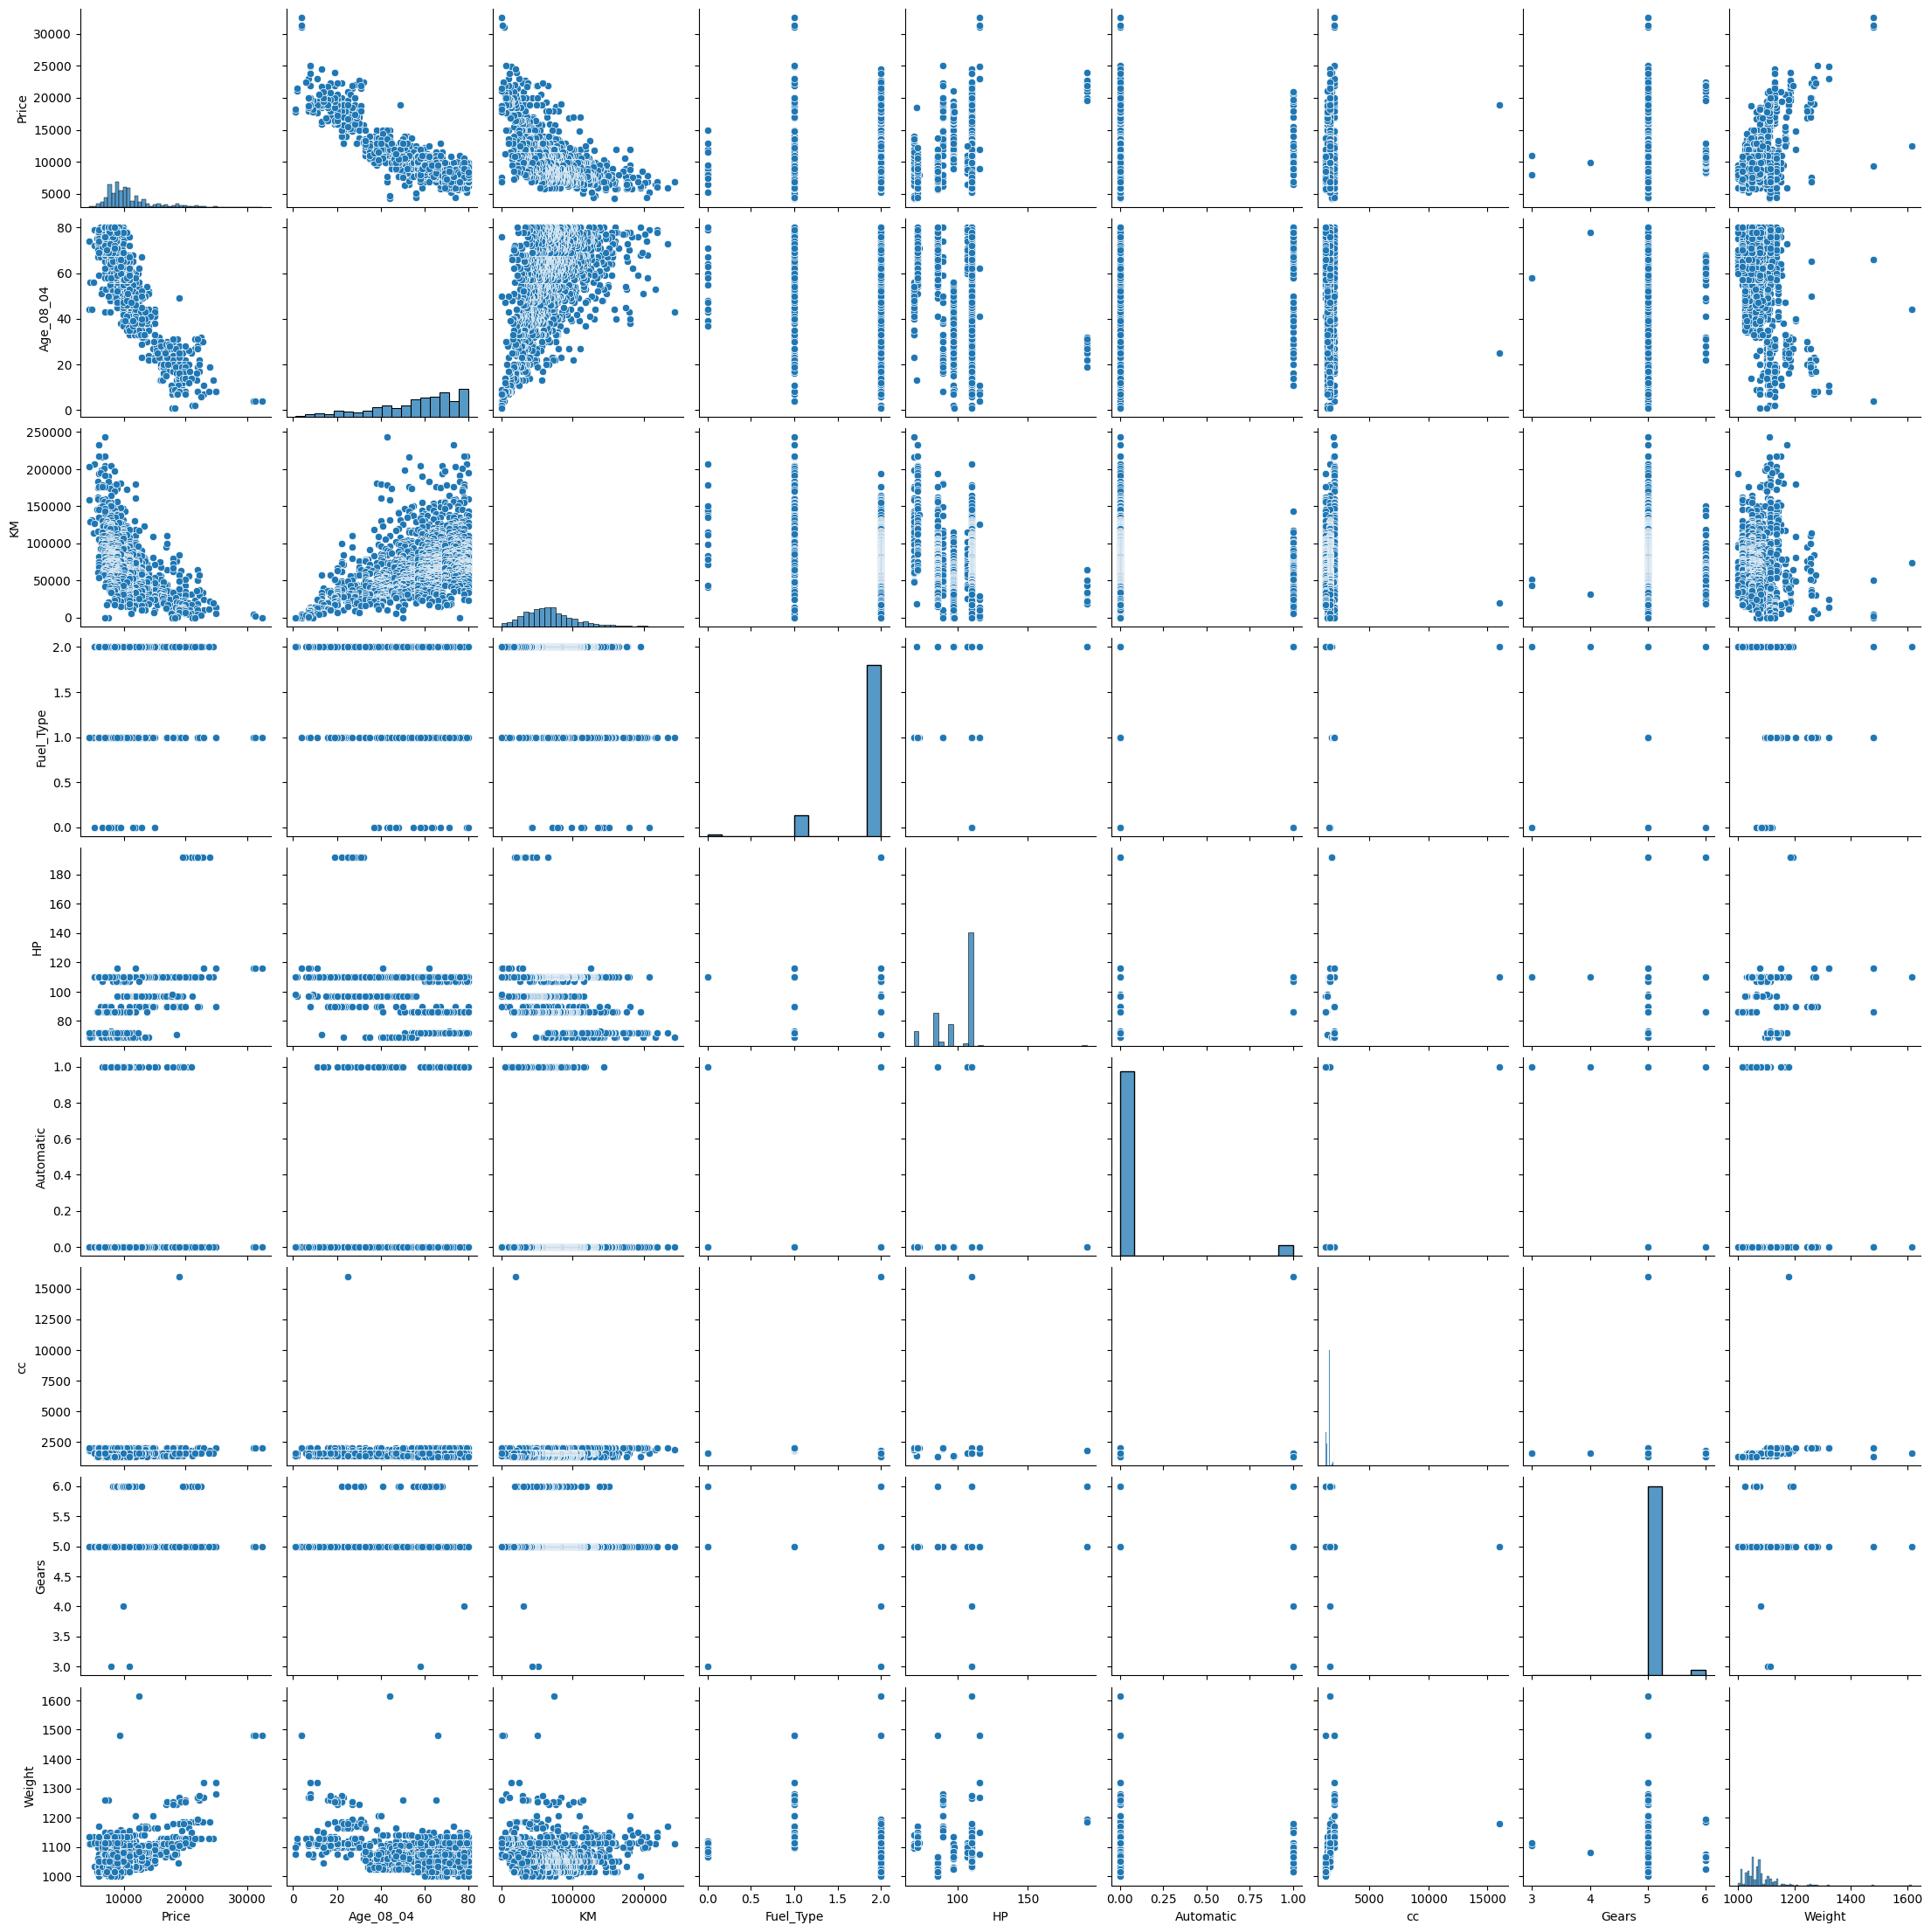

In [ ]:
sns.pairplot(data)

**Model1**

In [ ]:
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

**2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [ ]:
# Define feature variables (X) and target variable (y)
X = data.drop(columns=['Price'])
y = data['Price']

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3.Build a multiple linear regression model using the training dataset.Evaluate the model. Interpret the coefficients of the model.**

In [ ]:
# Initialize the linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display model coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 1639475.3423100263
R-squared: 0.8371434958868802
           Coefficient
Age_08_04 -2280.586620
KM         -729.543763
Fuel_Type   242.200859
HP          364.600283
Automatic   105.452928
cc          -36.681959
Gears       114.235206
Weight     1165.193899


**Model-2**

In [ ]:
# Multiple Linear Regression with Feature Selection

selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#Re-scale the selected features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

#Train the Multiple Linear Regression model with the selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected_scaled, y_train)

#Predict the target variable using the trained model
y_pred_lr_selected = lr_model_selected.predict(X_test_selected_scaled)

#Evaluate the model
mse_lr_selected = mean_squared_error(y_test, y_pred_lr_selected)
r2_lr_selected = r2_score(y_test, y_pred_lr_selected)
print(f'Multiple Linear Regression with Feature Selection - Mean Squared Error: {mse_lr_selected}')
print(f'Multiple Linear Regression with Feature Selection - R-squared: {r2_lr_selected}')

#Display model coefficients for the selected features
coefficients_selected = pd.DataFrame(lr_model_selected.coef_, selected_features, columns=['Coefficient'])
print(coefficients_selected)

Multiple Linear Regression with Feature Selection - Mean Squared Error: 1614285.488412569
Multiple Linear Regression with Feature Selection - R-squared: 0.8396457180545402
           Coefficient
Age_08_04 -2259.506694
KM         -820.478024
HP          475.042089
Weight     1033.223853


**Model 3: Apply Lasso and Ridge methods on the model.**

In [ ]:
#Initialize the Lasso and Ridge regression models
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)

#Fit the models to the training data
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

#Make predictions on the testing data
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

#Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso - Mean Squared Error: {mse_lasso}')
print(f'Lasso - R-squared: {r2_lasso}')

#Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge - Mean Squared Error: {mse_ridge}')
print(f'Ridge - R-squared: {r2_ridge}')

#Display model coefficients for Lasso and Ridge
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Lasso Coefficient'])
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Ridge Coefficient'])
print(coefficients_lasso)
print(coefficients_ridge)

Lasso - Mean Squared Error: 1637896.5004346753
Lasso - R-squared: 0.8373003293943637
Ridge - Mean Squared Error: 1639052.347880658
Ridge - R-squared: 0.8371855138375309
           Lasso Coefficient
Age_08_04       -2280.223099
KM               -729.669164
Fuel_Type         240.600894
HP                364.647783
Automatic         104.445276
cc                -35.305659
Gears             113.359673
Weight           1163.174027
           Ridge Coefficient
Age_08_04       -2278.234823
KM               -730.530432
Fuel_Type         241.082623
HP                364.827266
Automatic         105.288631
cc                -36.426619
Gears             114.249098
Weight           1164.639567


**Key Insights:**

Age_08_04:Typically, as the age of the car increases, its price decreases, reflected by a negative coefficient.

KM: Higher kilometers on the odometer often result in lower car prices, also indicated by a negative coefficient.

HP (Horse Power): More powerful cars (higher HP) tend to have higher prices, as suggested by a positive coefficient.

Weight: Heavier cars might be associated with higher prices, reflected by the coefficient's sign.

**Conclusion:**


The multiple linear regression model with feature selection provides a more interpretable and streamlined approach for predicting the price of Toyota Corolla cars. By focusing on key features such as age, kilometers driven, horsepower, and weight, the model captures the essential factors that influence car pricing. While the model performs reasonably well, further improvements could be made by exploring additional features or employing more advanced modeling techniques such as nonlinear models

**Interview Questions:**

1**.What is Normalization & Standardization and how is it helpful?**

Normalization and Standardization are two key techniques used in data preprocessing, particularly for preparing data for machine learning models.

**Normalization:**
Definition: Normalization is the process of scaling the features of your data to fall within a specific range, typically between 0 and 1 or -1 and 1
formula: xi = xi - min(x)/max(x) - min(X)
Normalization is useful when you want to ensure that all features contribute equally to the model. It is particularly beneficial when dealing with algorithms that rely on distance measurements, such as k-nearest neighbors (KNN) and neural networks.
**Standardization:**
Definition: Standardization is the process of transforming features to have a mean of 0 and a standard deviation of 1.
Formula: xi = xi - U / std
Standardization is crucial when you are dealing with algorithms that assume normally distributed data, such as linear regression, logistic regression, and support vector machines (SVM). It helps in ensuring that features with larger scales do not dominate the model’s predictions.

2.**What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This can lead to unreliable estimates of the coefficients, making it difficult to assess the effect of each variable on the dependent variable.

**Techniques to Address Multicollinearity:**
1.Remove Highly Correlated Predictors: Identify and remove correlated predictors using correlation matrices or Variance Inflation Factor (VIF).

2.Combine Features: Create new features by combining correlated ones, such as averaging them or taking their product.

3.Principal Component Analysis (PCA): Transform features into a set of uncorrelated components.

4.Regularization Techniques: Use Ridge or Lasso regression to penalize the size of coefficients, thus reducing the impact of multicollinearity.